In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ai4i2020.csv")

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.info())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [2]:
# Drop unnecessary columns
df.drop(columns=['UDI', 'Product ID'], inplace=True)

In [3]:
# One-hot encode the 'Type' column
df = pd.get_dummies(df, columns=['Type'], drop_first=True)


In [4]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns for scaling
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows after scaling
print(df.head())


   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0            -0.952389                -0.947360                0.068185   
1            -0.902393                -0.879959               -0.729472   
2            -0.952389                -1.014761               -0.227450   
3            -0.902393                -0.947360               -0.590021   
4            -0.902393                -0.879959               -0.729472   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  \
0     0.282200        -1.695984                0    0    0    0    0    0   
1     0.633308        -1.648852                0    0    0    0    0    0   
2     0.944290        -1.617430                0    0    0    0    0    0   
3    -0.048845        -1.586009                0    0    0    0    0    0   
4     0.001313        -1.554588                0    0    0    0    0    0   

   Type_L  Type_M  
0       0       1  
1       1       0  
2       1       0  
3     

In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Machine failure'])
y = df['Machine failure']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check dataset shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(7000, 12) (3000, 12) (7000,) (3000,)


In [6]:
# Create new features
df['Temperature Difference'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['Torque_Speed_Ratio'] = df['Torque [Nm]'] / df['Rotational speed [rpm]']

# Display first few rows with new features
print(df.head())


   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0            -0.952389                -0.947360                0.068185   
1            -0.902393                -0.879959               -0.729472   
2            -0.952389                -1.014761               -0.227450   
3            -0.902393                -0.947360               -0.590021   
4            -0.902393                -0.879959               -0.729472   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  \
0     0.282200        -1.695984                0    0    0    0    0    0   
1     0.633308        -1.648852                0    0    0    0    0    0   
2     0.944290        -1.617430                0    0    0    0    0    0   
3    -0.048845        -1.586009                0    0    0    0    0    0   
4     0.001313        -1.554588                0    0    0    0    0    0   

   Type_L  Type_M  Temperature Difference  Torque_Speed_Ratio  
0       0       1     

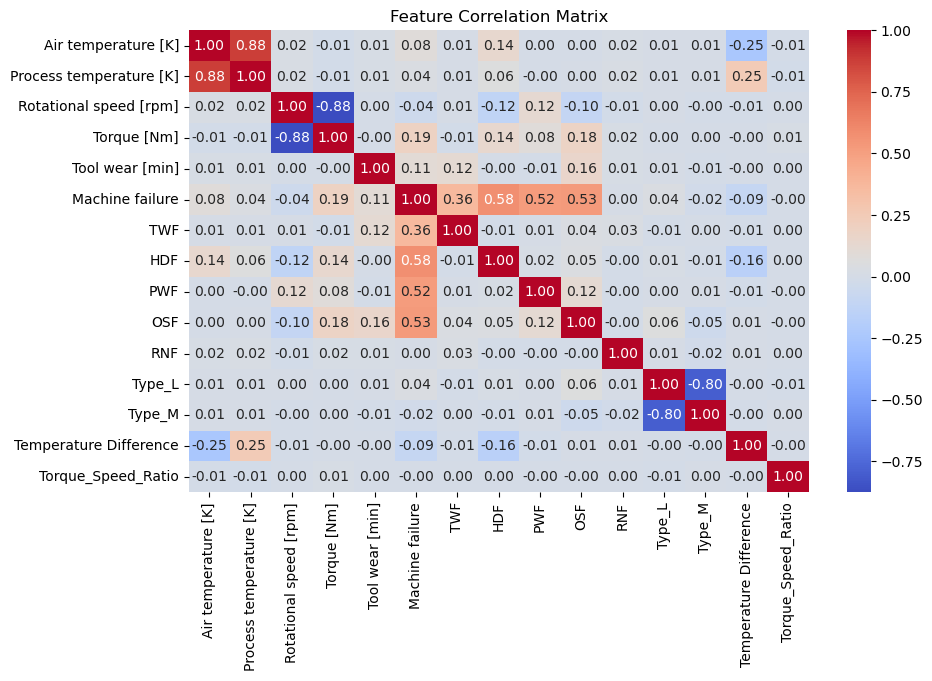

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variable 'Type'
label_encoder = LabelEncoder()

# Define feature variables (X) and target variable (y)
X = df.drop(columns=['Machine failure'])
y = df['Machine failure']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Check shapes of resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7000, 14), (3000, 14), (7000,), (3000,))

In [9]:
import numpy as np

# Create new feature: Difference between process and air temperature
df['Temp Difference'] = df['Process temperature [K]'] - df['Air temperature [K]']

# Create new feature: Torque-Speed Ratio
df['Torque-Speed Ratio'] = df['Torque [Nm]'] / df['Rotational speed [rpm]']

# Create new feature: Interaction term between tool wear and rotational speed
df['Wear-Speed Interaction'] = df['Tool wear [min]'] * df['Rotational speed [rpm]']

# Standardize the newly created features
new_features = ['Temp Difference', 'Torque-Speed Ratio', 'Wear-Speed Interaction']
df[new_features] = scaler.fit_transform(df[new_features])

# Update feature set and resplit dataset
X = df.drop(columns=['Machine failure'])
y = df['Machine failure']
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Check the updated feature set
X_train.shape, X_test.shape


((7000, 17), (3000, 17))

In [10]:
from sklearn.ensemble import IsolationForest

# Train an Isolation Forest model for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies (-1 = anomaly, 1 = normal)
anomalies = iso_forest.predict(X_test)

# Convert results to binary (1 = anomaly, 0 = normal)
anomalies = np.where(anomalies == -1, 1, 0)

# Count detected anomalies
np.sum(anomalies)


168

In [11]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Train an Isolation Forest model for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies (-1 = anomaly, 1 = normal)
anomalies = iso_forest.predict(X_test)

# Convert results to binary (1 = anomaly, 0 = normal)
anomalies = np.where(anomalies == -1, 1, 0)

# Count detected anomalies
print(f"Number of anomalies detected: {np.sum(anomalies)}")


Number of anomalies detected: 168


In [12]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies
anomalies = iso_forest.predict(X_test)
anomalies = np.where(anomalies == -1, 1, 0)  # Convert to binary

# Count detected anomalies
print(f"Anomalies detected: {np.sum(anomalies)}")


Anomalies detected: 168


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict maintenance needs
y_pred = rf_model.predict(X_test)

# Evaluate model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9993333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2898
           1       1.00      0.98      0.99       102

    accuracy                           1.00      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000



In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)

# Precision Score
precision = precision_score(y_test, y_pred)

# Recall Score
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Results
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy Score: 0.9993
Precision Score: 1.0000
Recall Score: 0.9804
F1 Score: 0.9901

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2898
           1       1.00      0.98      0.99       102

    accuracy                           1.00      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000


Confusion Matrix:
 [[2898    0]
 [   2  100]]


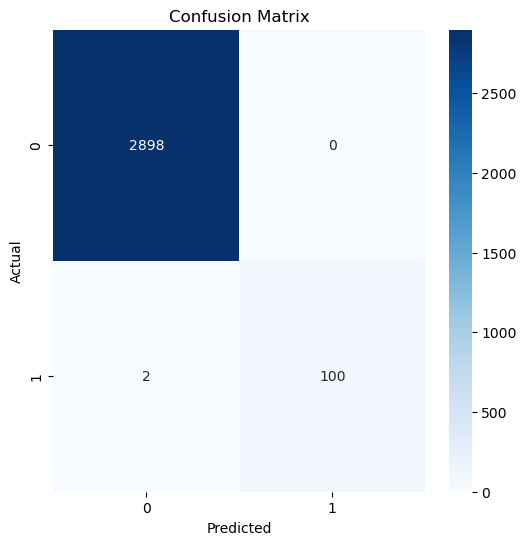

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
import numpy as np

# Function to take user input and make predictions
def predict_maintenance():
    print("\nEnter Sensor Values:")

    # Ask user to input values for each feature
    user_input = []
    for col in X.columns:  # Loop over all feature names
        value = float(input(f"Enter {col}: "))  # Convert input to float
        user_input.append(value)

    # Convert to NumPy array and reshape for prediction
    user_input = np.array(user_input).reshape(1, -1)

    # Make prediction
    prediction = rf_model.predict(user_input)

    # Display result
    if prediction[0] == 1:
        print("\n🔴 Maintenance Required!")
    else:
        print("\n🟢 No Maintenance Needed!")

# Run the function
predict_maintenance()



Enter Sensor Values:
Enter Air temperature [K]: 500
Enter Process temperature [K]: 700
Enter Rotational speed [rpm]: 250
Enter Torque [Nm]: 340
Enter Tool wear [min]: 234
Enter TWF: 89
Enter HDF: 87
Enter PWF: 45
Enter OSF: 45
Enter RNF: 45
Enter Type_L: 67
Enter Type_M: 98
Enter Temperature Difference: 34
Enter Torque_Speed_Ratio: 56
Enter Temp Difference: 46
Enter Torque-Speed Ratio: 54
Enter Wear-Speed Interaction: 37

🔴 Maintenance Required!


In [17]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming 'X' is your features dataframe

joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [18]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_scaled)

joblib.dump(iso_forest, "isolation_forest.pkl")


['isolation_forest.pkl']

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)  # Assuming 'y' is your target variable

joblib.dump(rf_model, "random_forest_model.pkl")


['random_forest_model.pkl']

In [32]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load dataset
df = pd.read_csv("ai4i2020.csv")  # Update this with your actual dataset path

# Initialize the app
app = dash.Dash(__name__)

# Get numeric columns for selection
numeric_columns = df.select_dtypes(include=["number"]).columns.tolist()

# Layout
app.layout = html.Div([
    dcc.Dropdown(
        id="feature-dropdown",
        options=[{"label": col, "value": col} for col in numeric_columns],
        value=numeric_columns[0],  # Default value
        placeholder="Select a feature"
    ),
    dcc.Graph(id="feature-histogram")
])

# Callback
@app.callback(
    Output("feature-histogram", "figure"),
    Input("feature-dropdown", "value")
)
def update_graph(selected_feature):
    if selected_feature is None:
        selected_feature = numeric_columns[0]  # Set default column if Nonez

    fig = px.histogram(df, x=selected_feature, title=f"Distribution of {selected_feature}")
    return fig

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


In [35]:
import pandas as pd
import dash
from dash import dcc, html
import plotly.express as px
from dash.dependencies import Input, Output

# Load dataset
df = pd.read_csv("ai4i2020.csv")

# Initialize Dash app
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Dashboard with 8 Figures"),
    
    dcc.Graph(id='histogram'),
    dcc.Graph(id='boxplot'),
    dcc.Graph(id='scatter-plot'),
    dcc.Graph(id='line-chart'),
    dcc.Graph(id='pie-chart'),
    dcc.Graph(id='heatmap'),
    dcc.Graph(id='bar-chart'),
    dcc.Graph(id='violin-plot')
])

# Generate plots
@app.callback(
    Output('histogram', 'figure'),
    Output('boxplot', 'figure'),
    Output('scatter-plot', 'figure'),
    Output('line-chart', 'figure'),
    Output('pie-chart', 'figure'),
    Output('heatmap', 'figure'),
    Output('bar-chart', 'figure'),
    Output('violin-plot', 'figure'),
    Input('histogram', 'id')
)
def update_graphs(_):
    fig1 = px.histogram(df, x=df.columns[1], title='Histogram of Feature')
    fig2 = px.box(df, y=df.columns[2], title='Boxplot of Feature')
    fig3 = px.scatter(df, x=df.columns[3], y=df.columns[4], title='Scatter Plot')
    fig4 = px.line(df, x=df.index, y=df.columns[5], title='Line Chart')
    fig5 = px.pie(df, names=df.columns[6], title='Pie Chart')
    fig6 = px.imshow(df.corr(), title='Heatmap of Correlations')
    fig7 = px.bar(df, x=df.columns[7], title='Bar Chart of Categorical Data')
    fig8 = px.violin(df, y=df.columns[8], title='Violin Plot of Feature')
    return fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8

# Run app
if __name__ == '__main__':
    app.run_server(debug=True, port=8055)


C:\Users\Admin\AppData\Local\Temp\ipykernel_20232\1378669278.py:43: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

